<a href="https://colab.research.google.com/github/eljimenezj/-Data-modeling-techniques/blob/master/Linear_Classifiers_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clasificadores lineales en Python

En este caso vamos a estudiar unas aplicaciones de clasificación utilizando  modelos machine learning. Este libro de jupyter está basado en clases tomadas de datacamp, en la cual también utilizamos una base de datos de vinos que utilizan en varias de sus clases.

Este curso hace parte del track Machine Learning Scientist with Python

In [0]:
import warnings
warnings.filterwarnings("ignore")

Los primeros clasificadores que vamos a estudiar son regresion logistica y maquinas de soporte vectorial

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

1.0
0.9577777777777777


In [3]:

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9970304380103935
0.98


Ahora haremos uso de probabilidades: El codigo necesita cargar los datos previamente para que funcione.

Fuente de datos: http://ai.stanford.edu/~amaas/data/sentiment/

Dateset: Este es un conjunto de datos para la clasificación de sentimientos binarios que contiene sustancialmente más datos que los conjuntos de datos de referencia anteriores. Proporcionamos un conjunto de 25,000 críticas de películas altamente polares para capacitación y 25,000 para pruebas. También hay datos adicionales sin etiquetar para su uso. Se proporcionan formatos de texto sin procesar y bolsa de palabras ya procesada. Consulte el archivo README contenido en la versión para obtener más detalles.

In [0]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X,y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

Ahora realizaremos una visualizacion de los límites de decisión en los datos para saber si es un problema linealmente separable o no.

In [0]:
from sklearn.datasets import load_wine
wine = load_wine()

X = wine.data
y = wine.target


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(),LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X,y)

# Grafica de funcion similiar a https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html , organizar.

## Funciones de perdida



In [0]:
# Funcion de perdida para regresion vs sklearn approach

In [0]:
import pandas as pd

url = 'https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv'
df = pd.read_csv(url)

## Creacion de arrays
# Creación de arrays para modelacion
y = df['life'].values
df = df.drop(['life','Region'],1)
X = df.values

In [21]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true-y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[ 1.17734464e-01  1.81818285e+08 -6.43831574e+06  6.56568897e+06
 -2.38870101e+07 -5.57804462e+02  2.48466019e+06 -6.33349629e+06]
[ 4.69982181e-09 -9.30637450e-03 -6.82869713e-01 -3.36508568e-01
  1.24186123e+00  1.67293030e-04  3.43861317e-01 -1.04486621e-01]


### Exploremos algo de regularización

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt



digits = datasets.load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)


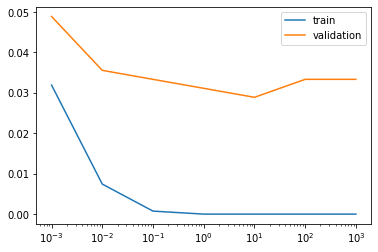

In [26]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in C_values :
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train,y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver = 'saga')


# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)


# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 640
Number of selected features: 418


### Multi-class logistic regression


In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [34]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial' , solver = 'lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 1.0
OVR test accuracy    : 0.96
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.96
